In [2]:
rm(list= ls())
ls()

character(0)

In [3]:
.libPaths(c("/hsfscqjf2/ST_CQ/Reference/software/envs/cellchat/lib/R/library",
           "/hsfscqjf2/ST_CQ/Reference/software/envs/RTest/lib/R/library"))

In [6]:
library(Seurat)
library(ggplot2)
library(future)
library(ggsci)
library(scales)
library(RColorBrewer)
library(ggplot2)
library(ggrepel)
library(ggpubr)


In [7]:
resultdir<-"/hsfscqjf1/ST_CQ/P24Z32300N0020/hemingmin/bom/10.sc_merged1/results/8_hippo_scores/"
dir.create(resultdir)
figuredir=resultdir
setwd(resultdir)

Warning message in dir.create(resultdir):
“'/hsfscqjf1/ST_CQ/P24Z32300N0020/hemingmin/bom/10.sc_merged1/results/8_hippo_scores' already exists”


In [5]:
markers<-read.csv(file='Hippo_sig_KEGG_gene_list',header = T,sep="\t")
head(markers)

,ID,descrip
,<int>,<chr>
1,692948,Lix1; Lix1 protein [KO:K16673]
2,101736045,extracellular serine/threonine protein kinase four-jointed [KO:K16674]
3,101746256,protein dachsous [KO:K16507]
4,101743456,cadherin-related tumor suppressor [KO:K16669]
5,692728,dbt; double-time protein [KO:K08960] [EC:2.7.11.1]
6,110385380,arginine-glutamic acid dipeptide repeats protein [KO:K05628]


In [6]:
library(AnnotationHub)
library(AnnotationDbi)
library(ggplot2)
bombyx.db <- loadDb("/hsfscqjf2/ST_CQ/PROJECT_Temp/hemingmin/3.Bmori/02.database/org.db/hmm.org.Bmori.eg.sqlite")


Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following object is masked from ‘package:SeuratObject’:

    intersect


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: BiocFileCache

Loading required package: dbplyr

Loading required package: stats4

Loading required package: Biobase

Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', a

In [18]:

geneset=as.character(na.omit(mapIds(x=bombyx.db,
                    keys = as.character(markers$ID),
                    keytype = "ENTREZID",
                    column = "SYMBOL")))
write.csv(geneset,file="Hippo_geneset.csv")

'select()' returned 1:1 mapping between keys and columns



In [13]:
geneset<-read.csv("./Hippo_geneset.csv")
head(geneset)

,X,x
,<int>,<chr>
1,1,Lix1
2,2,dbt
3,3,LOC101743219
4,4,LOC101747095
5,5,LOC101742621
6,6,Apkc


In [8]:
seurat_integrated<-readRDS("/hsfscqjf1/ST_CQ/P24Z32300N0020/hemingmin/bom/10.sc_merged1/results/5_anno/anno_filter.rds")

In [9]:
seurat_integrated$celltype<-seurat_integrated$celltype_v1

In [10]:
DefaultAssay(seurat_integrated) <- "RNA"

In [14]:
gene<-intersect(geneset$x,rownames(seurat_integrated@assays$RNA@counts))
length(gene)

[1] 30

# addmodulescore

In [15]:
pal_timepoint<-c("L5D1"="#EEE8DA",
                 "L5D2"="#BFE2E3",
                 "L5D3"="#A1CFFA",
                 "L5D4"="#A0BFAF",
                 "L5D5"="#78BDAD",
                 "L5D6"="#397A7F",
                 "L5D7"="#1F5392",
                 "WD1"="#F0918E",
                 "WD2"="#D45651",
                 "P6"="#AE98D6")
pal=c("Cell_morphogenesis"='#1f77b4',
  "Epithelial_1"='#279e68',
        "Epithelial_2"='#98df8a',
       "Epithelial_3"='#b5bd61',
"Cuticle_1"='#d62728',
 "Cuticle_2"='#e377c2',
 "Cuticle_3"='#ff9896',
 "Immune"='#f7b6d2',
 "Hemocyte"='#aa40fc',
"Metabolic_process"='#c49c94',
 "Axon_development"='#ffbb78',
 "Ciliated_cell"='#ff7f0e',
 "Others"='#564146')


In [16]:
scRNA<-AddModuleScore(
object=seurat_integrated,
features=list(gene),
ctrl=100,
name = "cell_Hippo_score")

In [17]:
table(Idents(scRNA))
metadata<-scRNA@meta.data
write.csv(metadata,file = "add_cell_Hippo_score.csv")


         Cuticle_3          Apoptosis          Cuticle_2             Immune 
             12045              13574               1721              28186 
     Ciliated_cell       Epithelial_2 Cell_morphogenesis   Axon_development 
               158              19992              26798                355 
         Cuticle_1       Epithelial_1  Metabolic_process       Epithelial_3 
              3980              18310                257                665 

# plot

In [1]:
data<-read.csv(file = "add_cell_Hippo_score.csv")

Warning message:
“Removed 12433 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 12433 rows containing non-finite values (`stat_boxplot()`).”


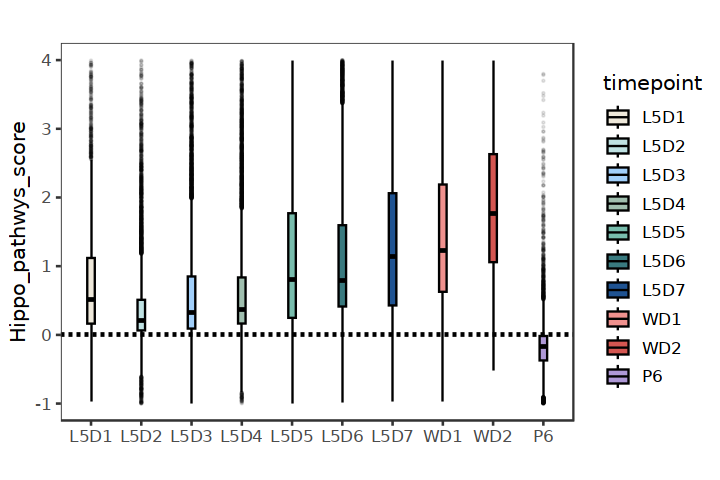

In [27]:
width=6
height=4
options(repr.plot.width = width, repr.plot.height=height)
p1 <- ggplot(data,aes(x=timepoint,y=cell_Hippo_score1,fill=timepoint))+
# geom_violin(fill="gray",alpha = 0.5) +
geom_boxplot(width = 0.15, color= "black",outlier.size = 0.2,outlier.alpha = 0.1) +
scale_fill_manual(values=pal_timepoint)+
ylim(-1,4)+
labs(x="",y="Hippo_pathwys_score",title=" ")+
 geom_hline(yintercept = 0,linetype = "dashed", size = 1)+
theme(axis.text.x = element_text(vjust = 1, hjust=1,size = 12,face="bold")) +
      theme(plot.title = element_text(hjust=0.5, face="bold")) +
 # stat_compare_means(method = "anova")+theme_classic ()+
# stat_compare_means(label = "p.signif", method = "wilcox.test",ref.group = ".all.", hide.ns = TRUE)+
theme_bw(base_size=12)+
         theme(panel.grid.major=element_line(colour=NA),
            panel.background = element_rect(fill = "transparent",colour = NA),
            plot.background = element_rect(fill = "transparent",colour = NA),
            panel.grid.minor = element_blank())

print(p1)
ggsave(p1,file='Hippo_score1_timepoint_sig.pdf',height = height,width=width)